In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

2025-01-29 18:42:30.021338: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-29 18:42:30.098442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-29 18:42:30.149247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738176150.201049  133414 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738176150.216727  133414 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 18:42:30.268439: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)
advertising_df

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
...,...,...,...,...,...
1195,13.80,149.7,35.6,6.0,17.3
1196,8.10,38.2,3.7,13.8,7.6
1197,6.40,94.2,4.9,8.1,9.7
1196,8.10,38.2,3.7,13.8,7.6


In [3]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [4]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [5]:
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Data Analysis

<Axes: >

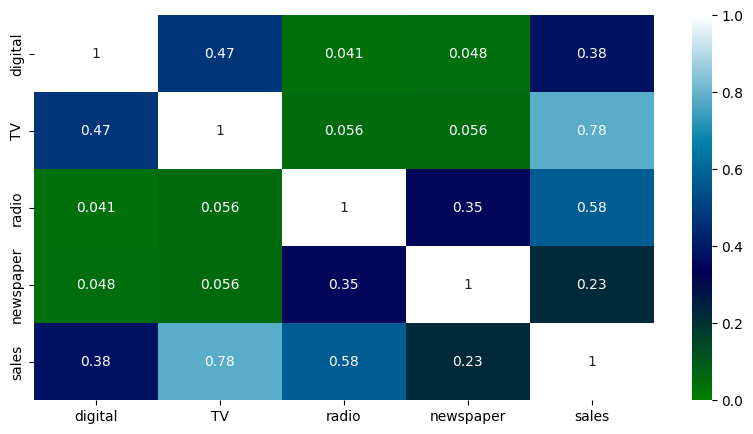

In [6]:
# show the correlation between all columns
plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(), annot=True, vmin=0, vmax=1, cmap='ocean')

In [7]:
# this is the same as the previous heatmap
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

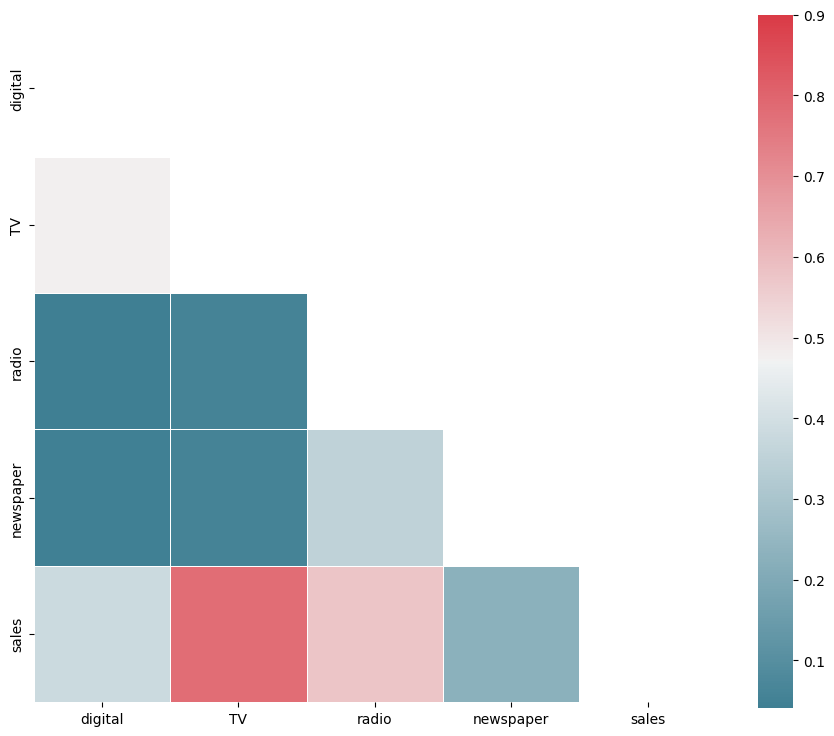

In [ ]:
# another visualization showing just top values
# Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

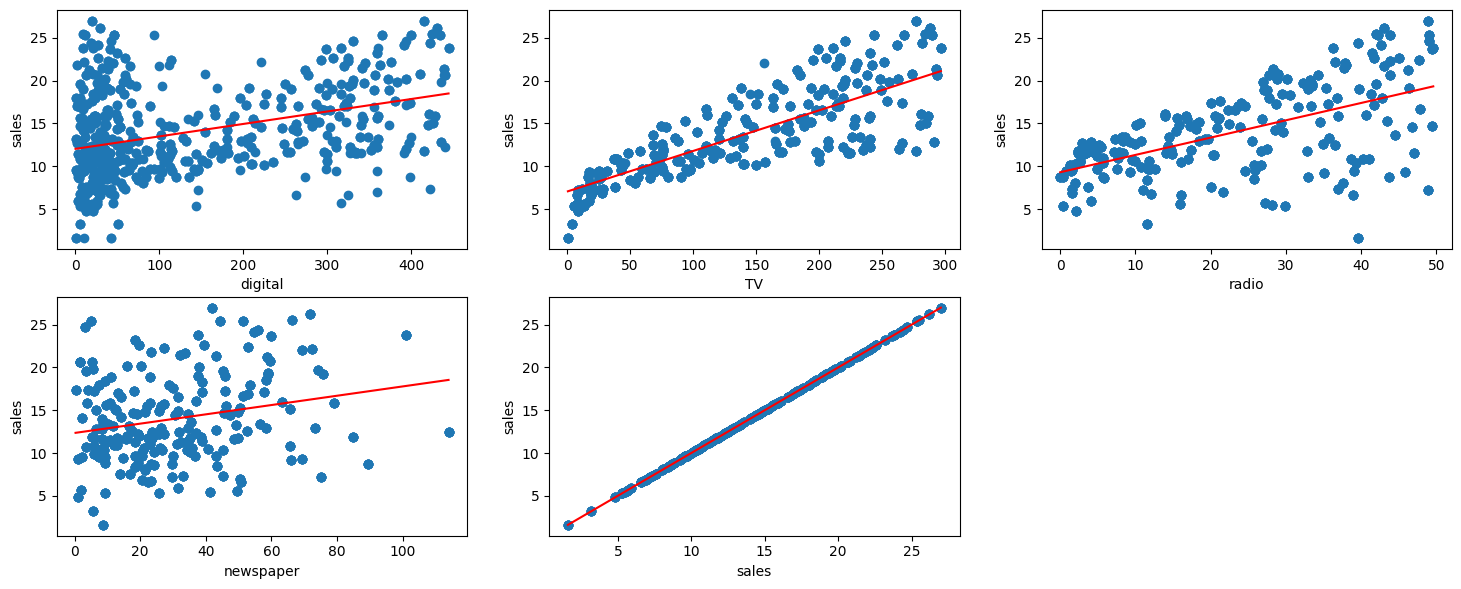

In [ ]:
# visualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label

## Train model

In [10]:
# select input and label
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df[['sales']]

# scale (normalize) the values in each column
normalized_features = keras.utils.normalize(X.values)

In [11]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(719, 4) (480, 4) (719, 1) (480, 1)


In [12]:
# create the model
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

# configure model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50


2025-01-29 18:42:37.050032: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 414.0140 - mse: 414.0140 - val_loss: 338.4066 - val_mse: 338.4066
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301.5016 - mse: 301.5016 - val_loss: 267.3903 - val_mse: 267.3903
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 240.2133 - mse: 240.2133 - val_loss: 234.7123 - val_mse: 234.7123
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 222.5463 - mse: 222.5463 - val_loss: 213.5309 - val_mse: 213.5309
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 218.1041 - mse: 218.1041 - val_loss: 195.9897 - val_mse: 195.9897
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 193.1167 - mse: 193.1167 - val_loss: 183.1548 - val_mse: 183.1548
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179.0587 - mse: 179.0587 - val_loss: 172.5014 - val_mse: 172.5014
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149.0604 - mse: 149.0604 - val_loss: 163.7061 - val_mse: 163.7061
Epoch 9/50
23/23 ━━

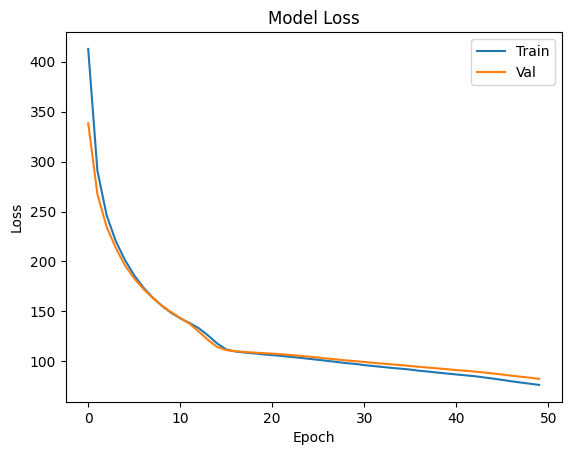

In [13]:
# visualize model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119 (480.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80 (324.00 B)

In [15]:
test_predictions = model.predict(X_test).flatten()
test_predictions

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([ 1.4650424,  1.4650424, 14.0825615,  1.4650424, 18.160095 ,
        1.4650424, 11.077431 ,  1.4650424,  1.4650424,  1.4650424,
        6.048272 ,  1.4650424,  3.583442 , 10.396599 , 11.835005 ,
        7.0533915, 22.6413   ,  8.178419 ,  6.8703084, 17.685658 ,
       16.930218 ,  6.146691 , 11.305794 ,  1.4650424,  1.4650424,
        3.064144 , 12.497753 ,  1.4650424,  1.4650424,  8.346727 ,
       14.150253 ,  1.4650424, 22.383705 ,  1.4650424, 26.05383  ,
       26.81963  , 22.466248 ,  1.57845  ,  1.4650424,  3.8652115,
       16.919834 ,  1.4650424,  7.2855954, 14.911583 , 12.459042 ,
        1.4650424,  9.055914 , 22.466248 ,  6.6743155,  9.2472515,
       10.316696 , 11.835005 , 11.825319 ,  1.4650424,  2.3662763,
       14.362839 , 18.609646 ,  3.6036654,  7.378817 ,  1.4650424,
       12.139875 , 11.980511 , 12.858873 ,  1.4650424,  4.659943 ,
       14.532684 ,  2.3664503, 19.36493  ,  1.4650424, 21.384369 ,
        4.318077 ,  1.4650424,  2.9060113,  1.4650424, 16.3074

In [16]:
true_values = y_test['sales'].tolist()

In [17]:
true_predicted = pd.DataFrame(list(zip(true_values, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(6)

,True Value,Predicted Value
0,26.2,1.465042
1,19.0,1.465042
2,12.8,14.082561
3,20.8,1.465042
4,16.9,18.160095
5,23.8,1.465042


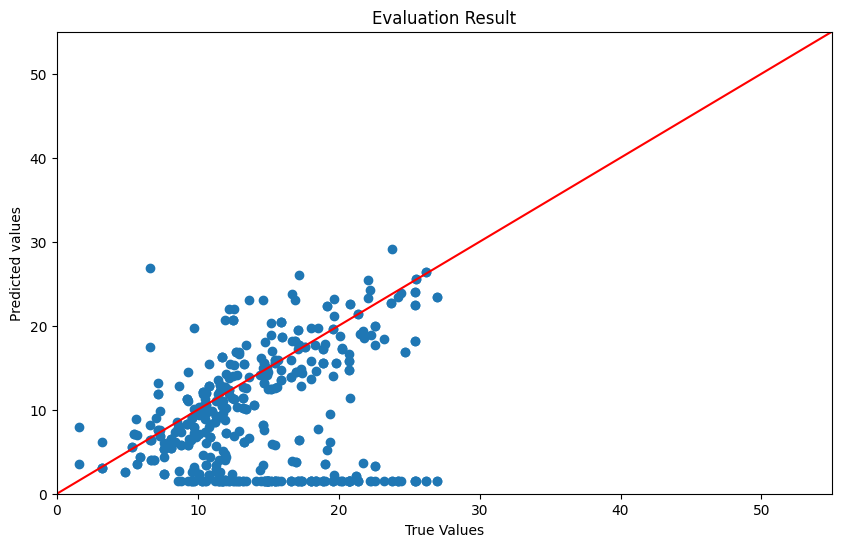

In [18]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()
